# Extract daily temperature from Environment Canada using Python 


The objective of this product is to retrieve daily temperature data from the second generation homogenized dataset of Environment and Climate Change Canada developed by Vincent et al. 2012.

Adjusted and homogenized Canadian climate dataset (DCCAH) were prepared to provide a better spatial and temporal representation of the climate trends in Canada. 

In the Second Generation of Homogenized Temperature, new adjustments were applied to the daily minimum temperatures at synoptic stations (mainly airports) to address the bias due to the change in observing time in July 1961 (Vincent et al. 2009). 

Daily homogenized temperatures (minimum, maximum and mean) can be dowloaded on this link: 
<b>ftp://ccrp.tor.ec.gc.ca/pub/EC_data/AHCCD_daily/</b>


Raw dataset can be downloaded here:  http://climate.weather.gc.ca/historical_data/search_historic_data_f.html

In this post, we will work on a specific province in Canada (using filters). To do this, we will use  Temperature_Stations.xls available on ftp site. This file provide us a list of all stations available. 


We first need to import our librairies: 

In [1]:

import pandas as pd
import os
from datetime import date
import calendar
import numpy as np
import pathlib
import warnings
warnings.filterwarnings("ignore")
from itertools import islice

We will work with daily minimum temperature data only for the Northwest Territories of Canada.

Referring to the document Temperature_Stations.xls, we see that the acronym for this province is: NWT.

In [2]:
dataframe = pd.read_excel("./Temperature_Stations.xls", skiprows = range(0, 3))
dataframe.head()

,Prov,Nom de station,stnid,année déb.,mois déb.,année fin.,mois fin.,lat (deg),long (deg),élév (m),stns jointes
0,BC,AGASSIZ,1100120,1893,1,2018,9,49.25,-121.77,15,N
1,BC,ATLIN,1200560,1905,8,2018,12,59.57,-133.70,674,N
2,BC,BARKERVILLE,1090660,1888,2,2015,3,53.07,-121.52,1265,N
3,BC,BEAVERDELL,1130771,1939,1,2006,9,49.48,-119.05,838,Y
4,BC,BELLA COOLA,1060841,1895,5,2017,11,52.37,-126.68,18,Y


Using this Dataframe we can define some input parameters to filter our data. 

In [3]:
varin = 'dn'                          # variable acronym                                                                  
path = 'Homog_daily_min_temp_v2018'   # path to get data                                       
varout = 'Tasmin'                      
province = 'NWT'                      # Province to work with

We can now filter our dataset. 

In [6]:
globals()['dataframe_'+province] = dataframe.loc[(dataframe["Prov"] == province),:]
globals()['dataframe_'+province]

,Prov,Nom de station,stnid,année déb.,mois déb.,année fin.,mois fin.,lat (deg),long (deg),élév (m),stns jointes
65,NWT,CAPE PARRY,2200675,1957,5,2018,12,70.17,-124.72,87,N
66,NWT,FORT GOOD HOPE,2201450,1944,8,2018,12,66.23,-128.65,82,Y
67,NWT,FORT MCPHERSON,2201601,1940,1,2014,11,67.40,-134.85,35,Y
68,NWT,FORT RELIANCE,2201903,1948,10,2018,12,62.72,-109.17,168,Y
69,NWT,FORT SIMPSON,2202103,1895,11,2018,12,61.77,-121.23,169,Y
70,NWT,FORT SMITH,2202201,1913,7,2018,12,60.02,-111.97,205,Y
71,NWT,HAY RIVER,2202401,1893,9,2018,12,60.83,-115.78,166,Y
72,NWT,INUVIK,2202578,1957,3,2018,12,68.30,-133.48,103,Y
73,NWT,MOULD BAY,250M001,1948,5,2018,12,76.23,-119.35,2,Y
74,NWT,NORMAN WELLS,2202801,1943,5,2018,12,65.28,-126.80,73,Y


We found 13 stations for this province. 

We want to work with YELLOWKNIFE station:  stnid = 2204101. 

In [13]:
stnid = '2204101'   
f1 = open('./'+path+'/'+str(varin)+str(stnid)+'.txt', 'r')
for line in islice(f1, 7):
        print(line)

2204101,    YELLOWKNIFE    ,  NWT, station joined    , Homogenized daily minimum temperature        , Deg Celcius,          Updated to December 2018

2204101,    YELLOWKNIFE    ,  NWT, station jointe    , Temperature quotidienne minimale homogeneisee, Deg Celcius, Mise a jour jusqu a decembre 2018

 Year Mo  Day 01  Day 02  Day 03  Day 04  Day 05  Day 06  Day 07  Day 08  Day 09  Day 10  Day 11  Day 12  Day 13  Day 14  Day 15  Day 16  Day 17  Day 18  Day 19  Day 20  Day 21  Day 22  Day 23  Day 24  Day 25  Day 26  Day 27  Day 28  Day 29  Day 30  Day 31

Annee Mo Jour 01 Jour 02 Jour 03 Jour 04 Jour 05 Jour 06 Jour 07 Jour 08 Jour 09 Jour 10 Jour 11 Jour 12 Jour 13 Jour 14 Jour 15 Jour 16 Jour 17 Jour 18 Jour 19 Jour 20 Jour 21 Jour 22 Jour 23 Jour 24 Jour 25 Jour 26 Jour 27 Jour 28 Jour 29 Jour 30 Jour 31

 1942  7    12.2    13.3    11.7    10.0     9.4    11.7    14.4    14.4    13.3    12.2    10.6    11.7    11.1    12.8    14.4    15.0    13.9    14.4    13.9    14.4    13.9    13.3

### Cleaning data: 

We see that in our dataset we have for each line the daily data by year and by month according to the structure:

<p style="color:blue;font-size:12px;">  Year Mo  Day 01  Day 02  Day 03  Day 04  Day 05  Day 06  Day 07  Day 08  Day 09  Day 10  Day 11  Day 12  Day 13  Day 14  Day 15  Day 16  Day 17  Day 18  Day 19  Day 20  Day 21  Day 22  Day 23  Day 24  Day 25  Day 26  Day 27  Day 28  Day 29  Day 30  Day 31 </p>  

There is a 4 rows header. We will delete this header and also delete the alphanumeric characters, clean the missing values and create a dataframe.

In [23]:
f1 = open('./'+path+'/'+str(varin)+str(stnid)+'.txt', 'r')
f2 = open('./tmp.txt', 'w')
for line in f1:
    for word in line:
            if word == 'M':
                f2.write(word.replace('M', ' '))
            elif word == 'a':
                f2.write(word.replace('a', ' '))                    
            else:
                f2.write(word)
f1.close()
f2.close()      
df_station = pd.read_csv('./tmp.txt', delim_whitespace=True, skiprows = range(0, 4))
df_station.head()

,1942,7,12.2,13.3,11.7,10.0,9.4,11.7.1,14.4,14.4.1,...,13.3.2,11.7.3,12.2.2,11.1.1,12.2.3,13.3.3,10.0.1,10.6.1,11.7.4,8.3
0,1942,8,7.8,5.0,9.4,12.8,9.4,9.4,10.0,10.6,...,7.8,12.2,8.9,3.9,7.2,10.6,11.1,7.2,5.0,3.3
1,1942,9,3.9,6.1,6.1,8.3,9.4,11.1,11.1,6.7,...,0.0,-1.7,1.1,-4.4,-0.6,0.0,-0.6,1.7,1.1,-9999.9
2,1942,10,0.0,4.4,1.7,5.0,3.3,-1.1,4.4,2.2,...,-6.7,-10.6,-11.1,-7.2,-2.2,-1.7,-1.1,-3.9,-5.0,-8.3
3,1942,11,-11.7,-13.9,-13.3,-12.8,-12.8,-12.8,-12.2,-17.8,...,-13.9,-18.3,-26.7,-32.2,-31.1,-34.4,-26.7,-30.0,-27.2,-9999.9
4,1942,12,-23.9,-20.6,-20.6,-25.0,-20.6,-20.6,-26.1,-27.8,...,-35.0,-35.6,-33.9,-26.1,-31.7,-34.4,-28.9,-24.4,-33.9,-40.6


That's better but we still have some missing values. We will also change column names.  

In [24]:
df_station.columns = ['Year', 'Month', 'D1','D2','D3','D4','D5','D6','D7','D8','D9','D10',
                                  'D11','D12','D13','D14','D15','D16','D17','D18','D19','D20',
                                  'D21','D22','D23','D24','D25','D26','D27','D28','D29','D30','D31']
     
os.remove("./tmp.txt")
   
   # nettoyage des valeurs manquantes 
try:  
    df_station = df_station.replace({'E':''}, regex=True)
except:
       pass
try: 
    df_station = df_station.replace({'a':''}, regex=True)
except:
       pass
try:     
    df_station = df_station.replace({'-9999.9':''}, regex=True)
except:
       pass
try:     
    df_station = df_station.replace({-9999.9:''}, regex=True)
except:
       pass    
    
for col in  df_station.columns[2:]:
       df_station[col] = pd.to_numeric(df_station[col], errors='coerce')      

In [25]:
df_station.head()

,Year,Month,D1,D2,D3,D4,D5,D6,D7,D8,...,D22,D23,D24,D25,D26,D27,D28,D29,D30,D31
0,1942,8,7.8,5.0,9.4,12.8,9.4,9.4,10.0,10.6,...,7.8,12.2,8.9,3.9,7.2,10.6,11.1,7.2,5.0,3.3
1,1942,9,3.9,6.1,6.1,8.3,9.4,11.1,11.1,6.7,...,0.0,-1.7,1.1,-4.4,-0.6,0.0,-0.6,1.7,1.1,-9999.9
2,1942,10,0.0,4.4,1.7,5.0,3.3,-1.1,4.4,2.2,...,-6.7,-10.6,-11.1,-7.2,-2.2,-1.7,-1.1,-3.9,-5.0,-8.3
3,1942,11,-11.7,-13.9,-13.3,-12.8,-12.8,-12.8,-12.2,-17.8,...,-13.9,-18.3,-26.7,-32.2,-31.1,-34.4,-26.7,-30.0,-27.2,-9999.9
4,1942,12,-23.9,-20.6,-20.6,-25.0,-20.6,-20.6,-26.1,-27.8,...,-35.0,-35.6,-33.9,-26.1,-31.7,-34.4,-28.9,-24.4,-33.9,-40.6


We can now detect the minimum and maximum recording years and write the daily data on a single column.

In [26]:
yearmin = df_station['Year'].min()                                  
yearmax = df_station['Year'].max()                                   
m_start =  df_station['Month'].loc[(df_station['Year'] == yearmin)].min()
m_end   =  df_station['Month'].loc[(df_station['Year'] == yearmax)].max()
d_end = calendar.monthrange(yearmax, m_end)[1]                     

tmp_tmin = [ ] 
for year in range(yearmin,yearmax+1):    ### Loop over years
    for month in range(1,13):
        df = []
        last_day = calendar.monthrange(year, month)[1] 
        tmin = df_station.loc[(df_station["Year"] == year) & (df_station["Month"] == month)].iloc[:,2:last_day+2].values
           
        if len(tmin) == 0:
            a = np.empty((calendar.monthrange(year,month)[1]))
            a[:] = np.nan
            df=pd.DataFrame(a)
        else:
            df=pd.DataFrame(tmin.T)
               
        start = date(year, month, 1)
        end =   date(year, month, last_day)
        delta=(end-start) 
        nb_days = delta.days + 1 
        rng = pd.date_range(start, periods=nb_days, freq='D')          
        df['datetime'] = rng
        df.index = df['datetime']
        tmp_tmin.append(df)
           
tmp_tmin = pd.concat(tmp_tmin) 
df = pd.DataFrame({'datetime': tmp_tmin['datetime'], 'Var': tmp_tmin.iloc[:,0]}, columns = ['datetime','Tmin']) 
df.index = df['datetime']
tmp_tmin = tmp_tmin.drop(["datetime"], axis=1)
tmp_tmin.head()

,0
datetime,
1942-01-01,NaN
1942-01-02,NaN
1942-01-03,NaN
1942-01-04,NaN
1942-01-05,NaN


### visualization: 

Quick visualization of the monthly average temperatures for the month of January.
We will group the data by month and calculate the average.

In [28]:
import matplotlib.pylab as plt
import datetime
month_tmin = tmp_tmin.resample('M').mean()
month_tmin.tail()

,0
datetime,
2018-08-31,8.987097
2018-09-30,-0.673333
2018-10-31,-4.990323
2018-11-30,-15.523333
2018-12-31,-21.812903


In [29]:
tmin_janvier = month_tmin[month_tmin.index.month==1]
tmin_janvier.head()

,0
datetime,
1942-01-31,NaN
1943-01-31,-32.687097
1944-01-31,-25.470968
1945-01-31,-28.635484
1946-01-31,-33.403226


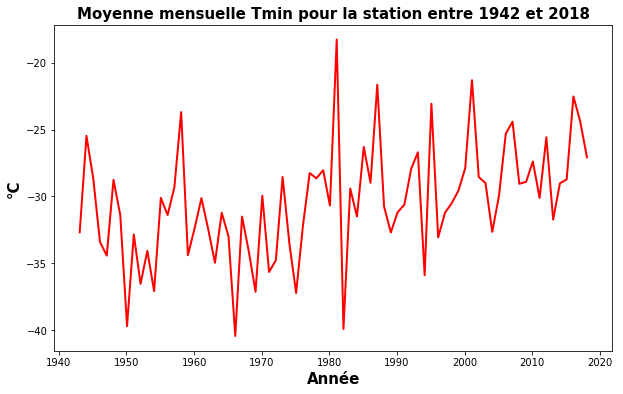

In [31]:
plt.rcParams["figure.figsize"]=[10,6]        
plt.plot(tmin_janvier.index, tmin_janvier[:],  label='Tmin Station', linewidth=2, c='r')
plt.title('Moyenne mensuelle Tmin pour la station entre ' + datetime.date(yearmin, 1, 1).strftime('%Y')+ ' et '  + datetime.date(yearmax, 1, 1).strftime('%Y'), fontsize=15, color='black', weight='semibold')
plt.xlabel('Année', fontsize=15, color='black', weight='semibold')
plt.ylabel('°C', fontsize=15, color='black', weight='semibold')
plt.show()

## Final code

The following code retrieves all stations for a specific province but for a common period.

For example, we wish to extract all daily temperature data for the province of the Northwest Territories but only for the common period 1989-2018.

We wish to have one file per station.

In [ ]:
import pandas as pd
import os
from datetime import date
import calendar
import numpy as np
import pathlib

################################################                                                            #
varin = 'dn'                                                                  
path = 'Homog_daily_min_temp_v2018'                                           
varout = 'Tasmoy'
province = 'NWT'  
yearmin = 1989 
yearmax = 2018
###############################################################################

dataframe = pd.read_excel("./Temperature_Stations.xls", skiprows = range(0, 3))

globals()['dataframe_'+province] = dataframe.loc[(dataframe["Prov"] == province) & (dataframe["année déb."] <= yearmin) & (dataframe["année fin."] >= yearmax),:]

names = []
for i, row in globals()['dataframe_'+province].iterrows():
   stnid = row['stnid']   
   f1 = open('./'+path+'/'+str(varin)+str(stnid)+'.txt', 'r')
   f2 = open('./tmp.txt', 'w')

   for line in f1:
        for word in line:
            if word == 'M':
                f2.write(word.replace('M', ' '))
            elif word == 'a':
                f2.write(word.replace('a', ' '))                    
            else:
                f2.write(word)
   f1.close()
   f2.close()
          
   station = pd.read_csv('./tmp.txt', delim_whitespace=True, skiprows = range(0, 4))
   
   station.columns = ['Annee', 'Mois', 'D1','D2','D3','D4','D5','D6','D7','D8','D9','D10',
                                  'D11','D12','D13','D14','D15','D16','D17','D18','D19','D20',
                                  'D21','D22','D23','D24','D25','D26','D27','D28','D29','D30','D31']
     
   os.remove("./tmp.txt")
 
   try:  
       station = station.replace({'E':''}, regex=True)
   except:
       pass
   try: 
       station = station.replace({'a':''}, regex=True)
   except:
       pass
   try:     
       station = station.replace({'-9999.9':''}, regex=True)
   except:
       pass
   try:     
       station = station.replace({-9999.9:''}, regex=True)
   except:
       pass    
       
   for col in  station.columns[2:]:
       station[col] = pd.to_numeric(station[col], errors='coerce')
        
   m_start =  station['Mois'].loc[(station['Annee'] == yearmin)].min()
   m_end   =  station['Mois'].loc[(station['Annee'] == yearmax)].max()
   
   d_end = calendar.monthrange(yearmax, m_end)[1]
     
   tmp_tmin = [ ] 
   for year in range(yearmin,yearmax+1):    ### Boucle sur les annees
       for month in range(1,13):
           df = []
           last_day = calendar.monthrange(year, month)[1] 
           tmin = station.loc[(station["Annee"] == year) & (station["Mois"] == month)].iloc[:,2:last_day+2].values
           
           if len(tmin) == 0:
               a = np.empty((calendar.monthrange(year,month)[1]))
               a[:] = np.nan
               df=pd.DataFrame(a)
           else:
               df=pd.DataFrame(tmin.T)
               
           start = date(year, month, 1)
           end =   date(year, month, last_day)
           delta=(end-start) 
           nb_days = delta.days + 1 
           rng = pd.date_range(start, periods=nb_days, freq='D')          
           df['datetime'] = rng
           df.index = df['datetime']
           tmp_tmin.append(df)
           
   tmp_tmin = pd.concat(tmp_tmin) 
   df = pd.DataFrame({'datetime': tmp_tmin['datetime'], 'Var': tmp_tmin.iloc[:,0]}, columns = ['datetime','Tmin']) 
   df.index = df['datetime']
   tmp_tmin = tmp_tmin.drop(["datetime"], axis=1)
      
   name = row['Nom de station'].replace(' ','_')
   name = name.replace("'",'')
   names.append(name)
   mypath='./Daily_data_by_Province/'+varout+'/'
   pathlib.Path(mypath).mkdir(parents=True, exist_ok=True)
   
   tmp_tmin.to_csv(mypath+name+'_daily_'+varout+'_'+str(yearmin)+'-'+str(yearmax)+'.csv')
         
latlon = pd.DataFrame({'Latitude': globals()['dataframe_'+province]["lat (deg)"], 'Longitude': globals()['dataframe_'+province]["long (deg)"] }, columns = ['Latitude','Longitude']) 
latlon.to_csv('./Daily_data_by_Province/stations_latlon_'+province+'.csv')
names = pd.DataFrame(names)
names.to_csv('./Daily_data_by_Province/stations_noms_'+province+'.csv')

base_filename = './Daily_data_by_Province/stations_noms_'+province+'.txt'
names[0].to_csv(base_filename, sep='\t', index = False) 